In [182]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Simple genetic algorithm for the 1-0 Knapsack problem
#### Mutation rate and crossover point can be modified for possible improvement.

In [207]:
# Maximum weight for the knapsack
MAX_WEIGHT = 1500

In [202]:
df = pd.read_csv('knapsack.csv')
df.head(7)
df

,Item_id,item_weights,item_values
0,1,21,96
1,2,12,99
2,3,30,52
3,4,24,100
4,5,45,46
...,...,...,...
95,96,47,93
96,97,28,6
97,98,24,53
98,99,25,12


In [208]:
# initialise the random selection of items (either 1 or 0 )
def initialise_pops():
    config = [random.randint(0, 1) for _ in range(100)]
    return config

In [161]:
# objective function: find better combination with the higher value between two
def compare_fitness(one, two):
    score_one = score_fitness(one)
    score_two = score_fitness(two)
    return one if score_one > score_two else two

In [209]:
# fitness evaluation
def score_fitness(config:list):
    weight_sum = 0
    values_sum = 0
    i = 0
   
    while weight_sum < MAX_WEIGHT and i < 100:
        if config[i] == 1:
            weight_sum += df.iloc[i].item_weights
            values_sum += df.iloc[i].item_values
        i += 1
    
    return values_sum
    
    

In [210]:
# crossover operation
def crossover(a:list, b:list):
    cpoint = int(len(a)/2)
    p1 = a[:]
    p2 = b[:]
    crossed1 = p1[:cpoint] + p2[cpoint:]
    crossed2 = p1[cpoint:] + p2[:cpoint]
    return crossed1, crossed2
 

In [211]:
# mutation opeation
def mutate(a):
    mutated = a[:]
    i = random.randint(0, len(mutated) - 1)
    mutated[i] = 0
    return mutated

In [190]:
# main function to generate solutions
def generic_algorithm_kanpsack(init_pop = 16, mutation=True):
    pops =[initialise_pops() for p in range(init_pop)]
    
    best_score = 0
    best_pop = []
    for i in range(init_pop - 3):
        #first gen
        first_gen_one = compare_fitness(pops[i], pops[i+1])
        first_gen_two = compare_fitness(pops[i+2], pops[i+3])
        
        second_one, second_two = crossover(first_gen_one, first_gen_two)
        
        current_best = compare_fitness(second_one, second_two)
        current_best_score = score_fitness(current_best)
        if mutation:
            current_best = mutate(current_best)
            current_best_score = score_fitness(current_best)
        
        if current_best_score > best_score:
            best_score = current_best_score
            best_pops = current_best
            
#     print(f'best score = {best_score}')
    return best_score
        
        

In [212]:
# display solutions and plot
def display_knapsack_values(iters=30):

    results= []
    for i in range(iters):
        results.append(generic_algorithm_kanpsack())

    plot_data = pd.DataFrame({'knapsack values': results, 'iterations': np.arange(1,iters+1,1, dtype=int)},
                            index=range(iters))

    print(plot_data)
    mean_val = np.mean(plot_data['knapsack values'])
    median_val = np.median(plot_data['knapsack values'])
    print('**********************************')
    print(f'Average Value:{round(mean_val, 2)}')
    print(f'Median Value:{median_val}')

    #styling
    plt.title('Knapsack Values', fontsize=17)
    plt.xlabel('Iterations', fontsize = 14)
    plt.ylabel('Values', fontsize = 14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.style.use('classic')

    #display
    plt.plot( plot_data['iterations'], plot_data['knapsack values'], color='#cc66ff', linewidth=3)
    plt.show()


    knapsack values  iterations
0              3201           1
1              3094           2
2              3251           3
3              3266           4
4              3186           5
5              3382           6
6              3264           7
7              3191           8
8              3094           9
9              3134          10
10             3196          11
11             3065          12
12             3314          13
13             3116          14
14             3216          15
15             3078          16
16             3237          17
17             3195          18
18             3360          19
19             3300          20
20             3033          21
21             3209          22
22             3493          23
23             3139          24
24             3113          25
25             3074          26
26             3359          27
27             3045          28
28             3194          29
29             3318          30
********

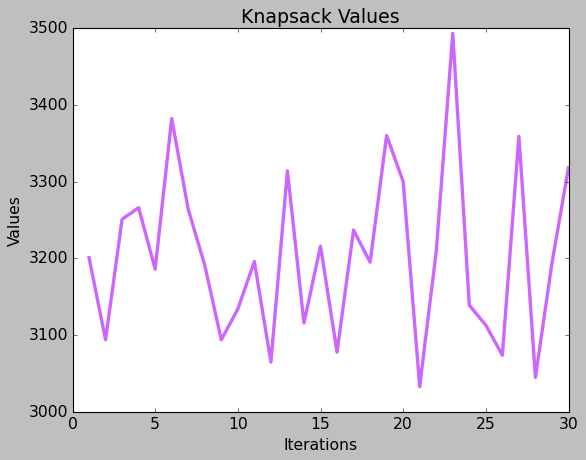

In [213]:
display_knapsack_values(iters=30)